In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hockey_rink import NHLRink, IIHFRink, NWHLRink
import sklearn
import sklearn.preprocessing

import torch

from sklearn.model_selection import train_test_split
import pickle

In [2]:
with open(f'scaler/enc_event.pkl','rb')as f:
    enc_event = pickle.load(f)
    
    f.close()
    
with open(f'scaler/scaler.pkl','rb')as f:
    scaler = pickle.load(f)
    
    f.close()

In [3]:
synth_data = np.load('synth_data/synth_data_timegan.npy')

In [4]:
for i in range(len(synth_data)):
    
    synth_data[i,:,:] = scaler.inverse_transform(synth_data[i,:,:])

In [5]:
l = []
x = []
y = []
for i in range(len(synth_data)):
    
    l.append(enc_event.inverse_transform(synth_data[i,:,0].reshape(-1,1)))
    x.append(synth_data[i,:,5])
    y.append(synth_data[i,:,6])

In [6]:
x = np.asarray(x)

y = np.asarray(y)

l = np.asarray(l)

l = l.reshape(-1, 24)

count = 0

final = []

with open('cord.txt','w+') as f:

    for i in range(len(l)):

        for j in range(24):

            f.write(f'{l[i,j]},{x[i,j]},{y[i,j]}\n')

            count += 1
                
    f.close()

In [7]:
synth_goal = pd.read_csv('cord.txt', sep=",", header=None)

synth_goal.columns = ["eventname", "xadjcoord", "yadjcoord"]

In [8]:
synth_goal[synth_goal['eventname'] == 'goal']

print(synth_goal.shape[1])

3


/home/fahim/virtualenv/pytorch/lib/python3.8/site-packages/hockey_rink/_rink_plot.py:728: UserWarning: The following kwargs were not used by contour: 'clip_on'
  img = ax.contourf(x_centers, y_centers, stat, zorder=zorder, **kwargs)


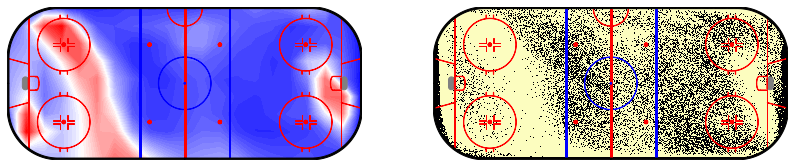

In [9]:
stats = 'count'
pltrange = 'full'

fig, axs = plt.subplots(1, 2, figsize=(14, 16))
rink = NHLRink(rotation=180)
for i in range(2):
    rink.draw(ax=axs[i], display_range=pltrange)

contour_img = rink.contourf(synth_goal['xadjcoord'], synth_goal['yadjcoord'], values = synth_goal['eventname'] == 'goal', ax=axs[0], cmap="bwr", 
                           plot_range=pltrange, binsize=10, levels=50, statistic=stats)


rink.heatmap(synth_goal['xadjcoord'], synth_goal['yadjcoord'], values = synth_goal['eventname'] == 'goal',  ax=axs[1], cmap="magma",  plot_range=pltrange, statistic=stats, vmax=0.1, binsize=0.5)

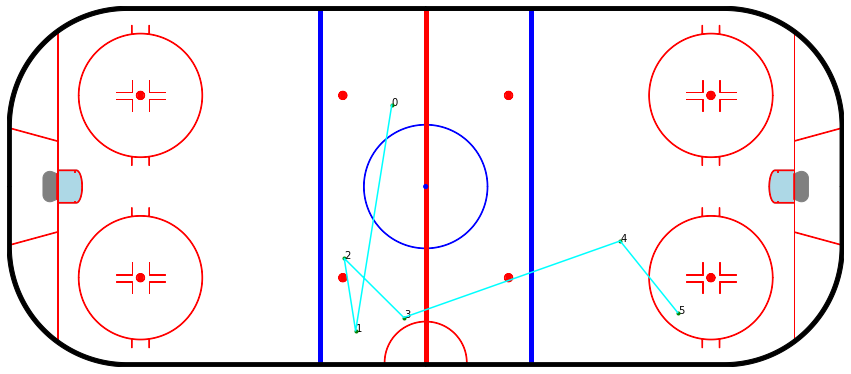

In [10]:
k, l = 608, 614
plt.figure(figsize=(15,8))
rink = NHLRink()
ax = rink.draw()
rink.scatter(synth_goal['xadjcoord'][k:l], synth_goal['yadjcoord'][k:l], marker = '.',  color= 'green')
rink.plot(synth_goal['xadjcoord'][k:l], synth_goal['yadjcoord'][k:l], color= 'cyan')


x_cord = np.asarray(synth_goal['xadjcoord'][k:l])
y_cord = np.asarray(synth_goal['yadjcoord'][k:l])

for i in range(len(synth_goal[k:l])):
    
    ax.annotate(i, (x_cord[i], y_cord[i]))
    
plt.savefig('goal.png')

plt.show()

In [11]:
synth_goal.loc[608:613]

,eventname,xadjcoord,yadjcoord
608,carry,-8.187723,19.682789
609,rebound,-16.910313,-34.843334
610,pass,-19.662125,-17.326357
611,puckprotection,-5.287961,-31.607763
612,offside,46.929260,-13.129886
613,goal,60.826790,-30.427969
